In [1]:
from matplotlib.path import Path
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

# 3000 particles were released at various depthts at time=0 in the following domain marked by the black rectangle.

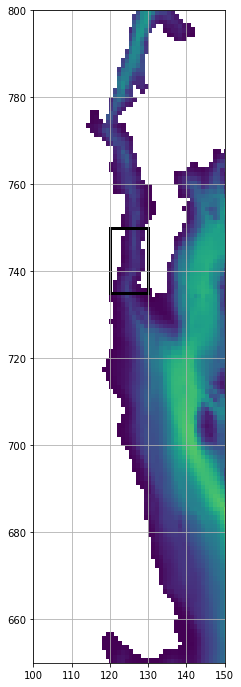

In [3]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(650,800)
ax.set_xlim(100,150)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((120,735), 10, 15, fill=False, linewidth=3))
ax.grid('on')

In [3]:
Jul = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Jul16NorthMore/ariane_trajectories_qualitative.nc')
Jul_latt = Jul.variables['traj_lat']
Jul_lont = Jul.variables['traj_lon']
Oct = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Oct16NorthMore/ariane_trajectories_qualitative.nc')
Oct_latt = Oct.variables['traj_lat']
Oct_lont = Oct.variables['traj_lon']
Jan = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Jan17NorthMore/ariane_trajectories_qualitative.nc')
Jan_latt = Jan.variables['traj_lat']
Jan_lont = Jan.variables['traj_lon']
Apr = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Apr17NorthMore/ariane_trajectories_qualitative.nc')
Apr_latt = Apr.variables['traj_lat']
Apr_lont = Apr.variables['traj_lon']
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

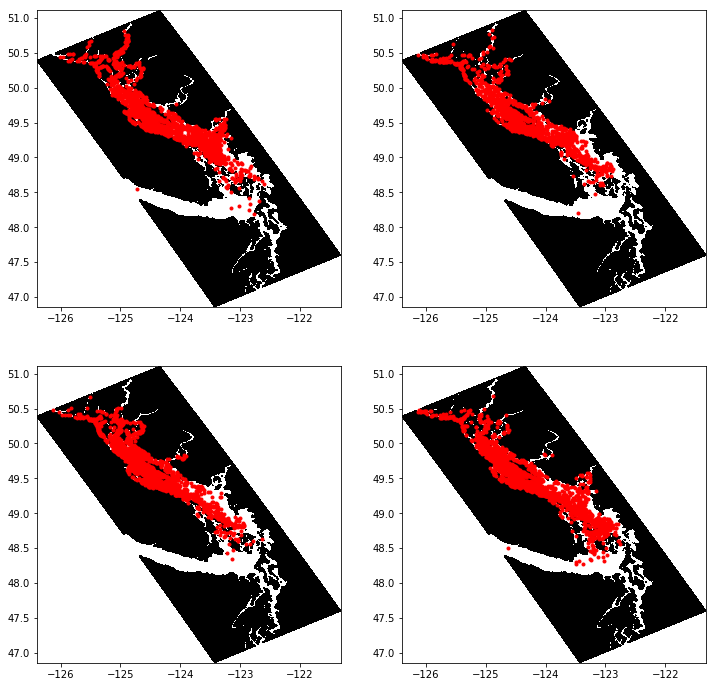

In [8]:
fig,ax= plt.subplots(2,2, figsize=(12,12))
l = 743
ax[0,0].plot(Jul_lont[l,:], Jul_latt[l,:], 'r.')
ax[0,1].plot(Oct_lont[l,:], Oct_latt[l,:], 'r.')
ax[1,0].plot(Jan_lont[l,:], Jan_latt[l,:], 'r.')
ax[1,1].plot(Apr_lont[719,:], Apr_latt[719,:], 'r.')
viz_tools.plot_land_mask(ax[0,0], grid, coords='map')
viz_tools.plot_land_mask(ax[0,1], grid, coords='map')
viz_tools.plot_land_mask(ax[1,0], grid, coords='map')
viz_tools.plot_land_mask(ax[1,1], grid, coords='map')

In [4]:
def still_inside(il, ir, jl, jr, lont, latt):
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    for l in range(time):
        cx = lont[l,:]
        cy = latt[l,:]
        pts = np.array([cx,cy]).T
        test = poly.contains_points(pts)
        number_of_particles[l]= sum(test) / particles
    return number_of_particles
def deep_particles(lont,latt,init_z, il, ir, jl, jr):
    mask = lont[:].mask
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    index_deep_particles=[]
    for n in range(particles):
        if init_z[n] > 6:
            index_deep_particles.append(n)
    length_of_deep_particles = len(index_deep_particles)
    number_of_deep_particles = np.zeros(time)
    for n in range(time):
        for m in index_deep_particles:
            if (mask[n,m]) == False: 
                tf = poly.contains_point(np.array((lont[n,m], latt[n,m])).T)
                if tf == True:
                    number_of_deep_particles[n] = number_of_deep_particles[n] + 1
    return (number_of_deep_particles / length_of_deep_particles)
def shallow_particles(lont,latt,init_z, il, ir, jl, jr):
    mask = lont[:].mask
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    index_shallow_particles=[]
    for n in range(particles):
        if init_z[n] < 6:
            index_shallow_particles.append(n)
    length_of_shallow_particles = len(index_shallow_particles)
    number_of_shallow_particles = np.zeros(time)
    for n in range(time):
        for m in index_shallow_particles:
            if (mask[n,m]) == False: 
                tf = poly.contains_point(np.array((lont[n,m], latt[n,m])).T)
                if tf == True:
                    number_of_shallow_particles[n] = number_of_shallow_particles[n] + 1
    return (number_of_shallow_particles / length_of_shallow_particles)

# Starting Location

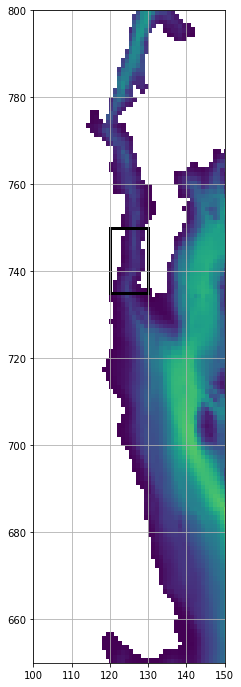

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(650,800)
ax.set_xlim(100,150)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((120,735), 10, 15, fill=False, linewidth=3))
ax.grid('on')

In [11]:
Jul_CR_all = still_inside(120, 130, 735, 750, Jul_lont, Jul_latt)
Oct_CR_all = still_inside(120, 130, 735, 750, Oct_lont, Oct_latt)
Jan_CR_all = still_inside(120, 130, 735, 750, Jan_lont, Jan_latt)
Apr_CR_all = still_inside(120, 130, 735, 750, Apr_lont, Apr_latt)

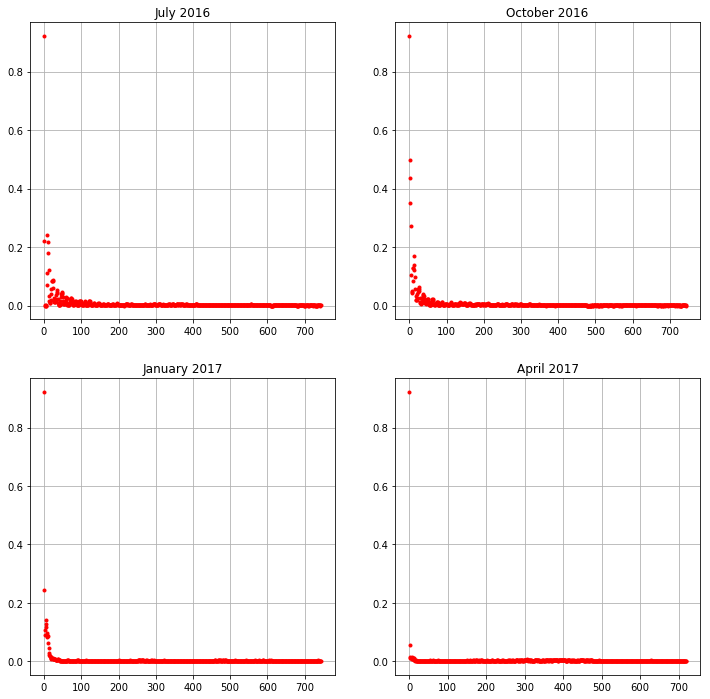

In [12]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_CR_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_CR_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_CR_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_CR_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [5]:
Jul_CR_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 120, 130, 735, 750)
Oct_CR_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 120, 130, 735, 750)
Jan_CR_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 120, 130, 735, 750)
Apr_CR_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 120, 130, 735, 750)

### Deep Particles

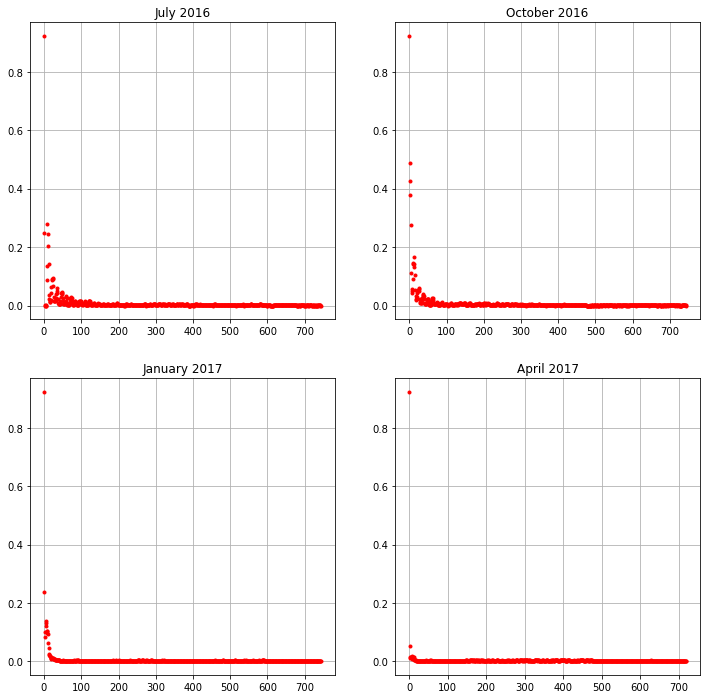

In [6]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_CR_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_CR_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_CR_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_CR_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [7]:
Jul_CR_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 120, 130, 735, 750)
Oct_CR_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 120, 130, 735, 750)
Jan_CR_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 120, 130, 735, 750)
Apr_CR_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 120, 130, 735, 750)

### Shallow Particles

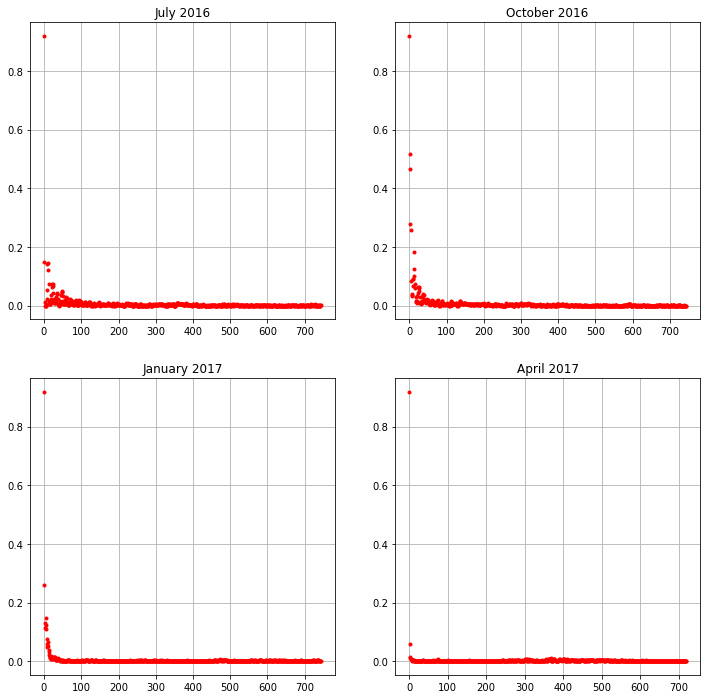

In [8]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_CR_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_CR_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_CR_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_CR_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# Northwest

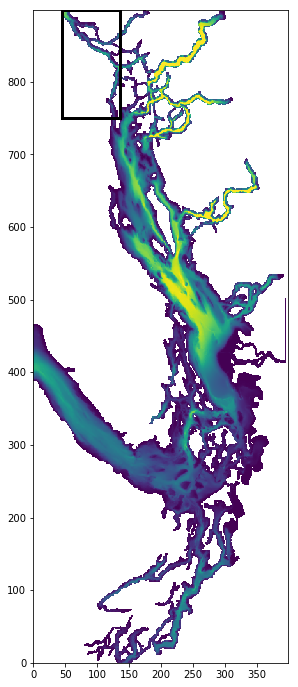

In [14]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((45,750), 90, 898-750, fill=False, linewidth=3))

In [15]:
Jul_NW_all = still_inside(45, 135, 750, 897, Jul_lont, Jul_latt)
Oct_NW_all = still_inside(45, 135, 750, 897, Oct_lont, Oct_latt)
Jan_NW_all = still_inside(45, 135, 750, 897, Jan_lont, Jan_latt)
Apr_NW_all = still_inside(45, 135, 750, 897, Apr_lont, Apr_latt)

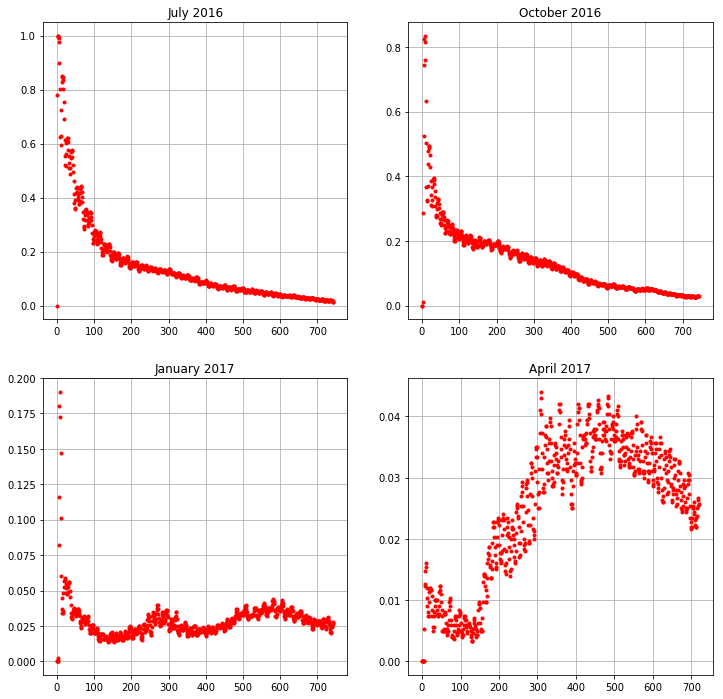

In [16]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NW_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NW_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NW_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NW_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [9]:
Jul_NW_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 45, 135, 750, 897)
Oct_NW_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 45, 135, 750, 897)
Jan_NW_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 45, 135, 750, 897)
Apr_NW_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 45, 135, 750, 897)

### Deep Particles

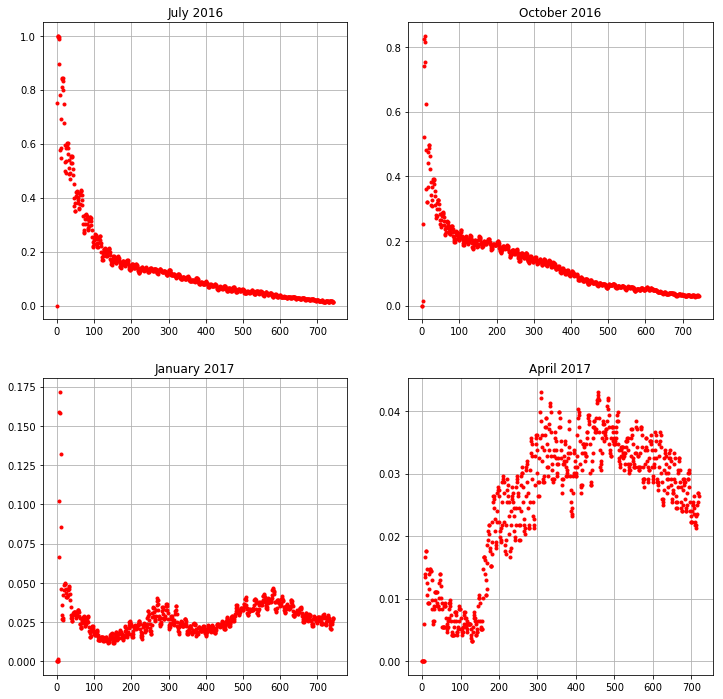

In [10]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NW_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NW_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NW_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NW_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [11]:
Jul_NW_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 45, 135, 750, 897)
Oct_NW_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 45, 135, 750, 897)
Jan_NW_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 45, 135, 750, 897)
Apr_NW_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 45, 135, 750, 897)

### Shallow Particles

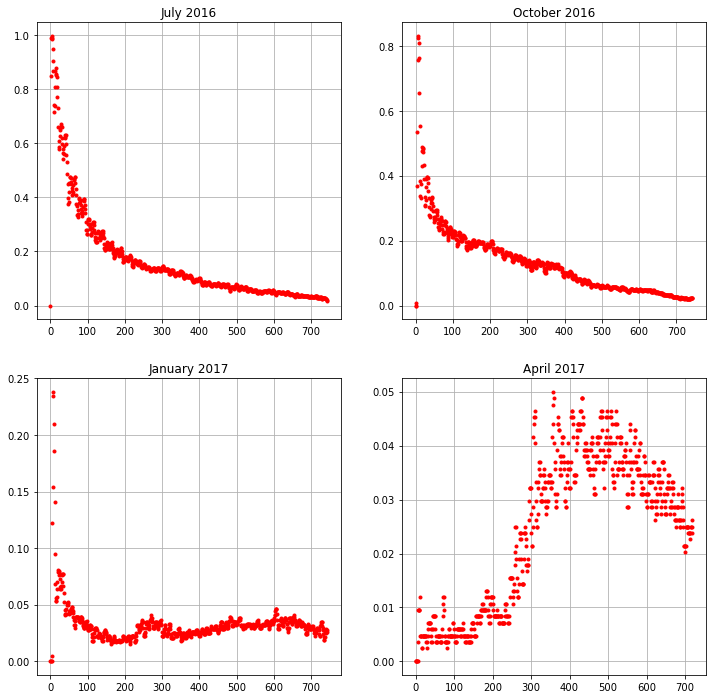

In [12]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NW_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NW_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NW_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NW_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# Northeast

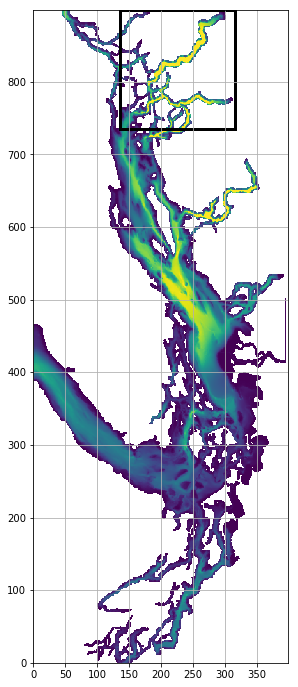

In [17]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((45+90,735), 180, 898-735, fill=False, linewidth=3))
ax.grid('on')

In [13]:
Jul_NE_all = still_inside(135, 315, 735, 897, Jul_lont, Jul_latt)
Oct_NE_all = still_inside(135, 315, 735, 897, Oct_lont, Oct_latt)
Jan_NE_all = still_inside(135, 315, 735, 897, Jan_lont, Jan_latt)
Apr_NE_all = still_inside(135, 315, 735, 897, Apr_lont, Apr_latt)

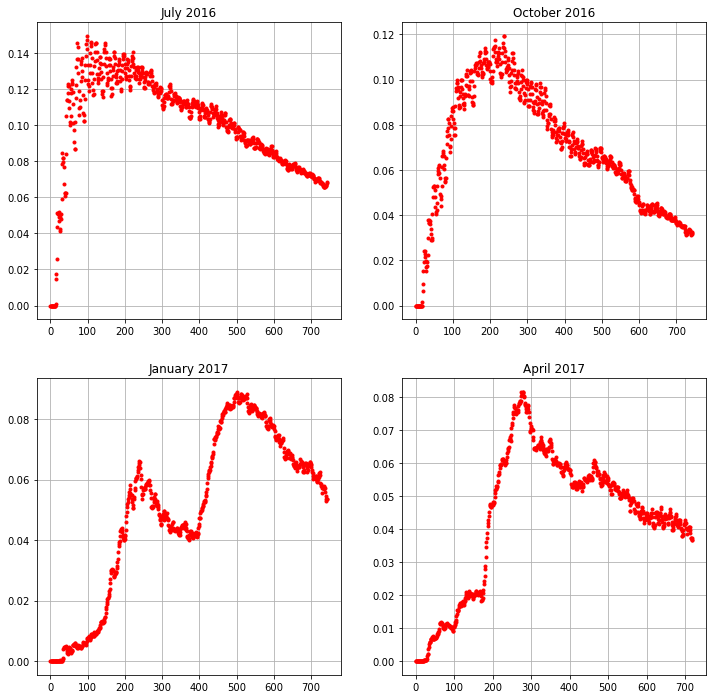

In [19]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NE_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NE_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NE_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NE_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [14]:
Jul_NE_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 135, 315, 735, 897)
Oct_NE_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 135, 315, 735, 897)
Jan_NE_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 135, 315, 735, 897)
Apr_NE_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 135, 315, 735, 897)

### Deep Particles

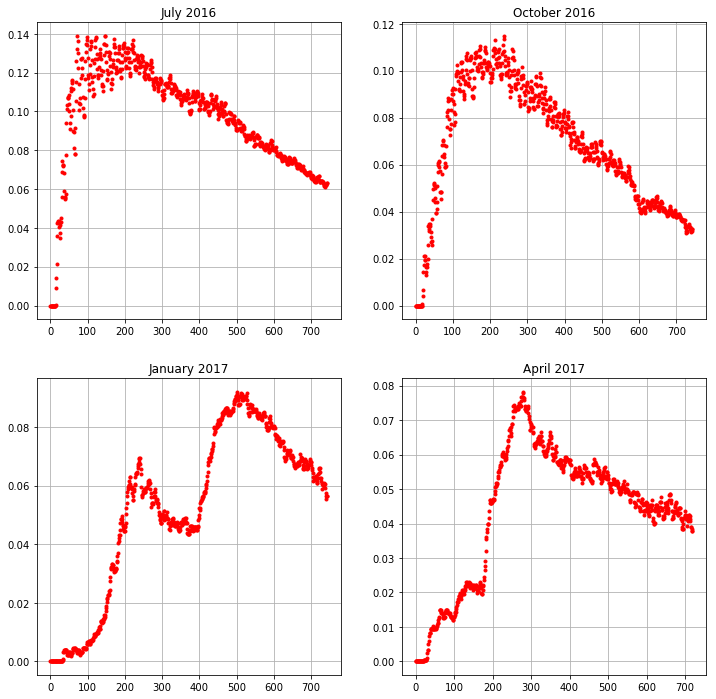

In [15]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NE_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NE_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NE_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NE_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [16]:
Jul_NE_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 135, 315, 735, 897)
Oct_NE_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 135, 315, 735, 897)
Jan_NE_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 135, 315, 735, 897)
Apr_NE_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 135, 315, 735, 897)

### Shallow Particles

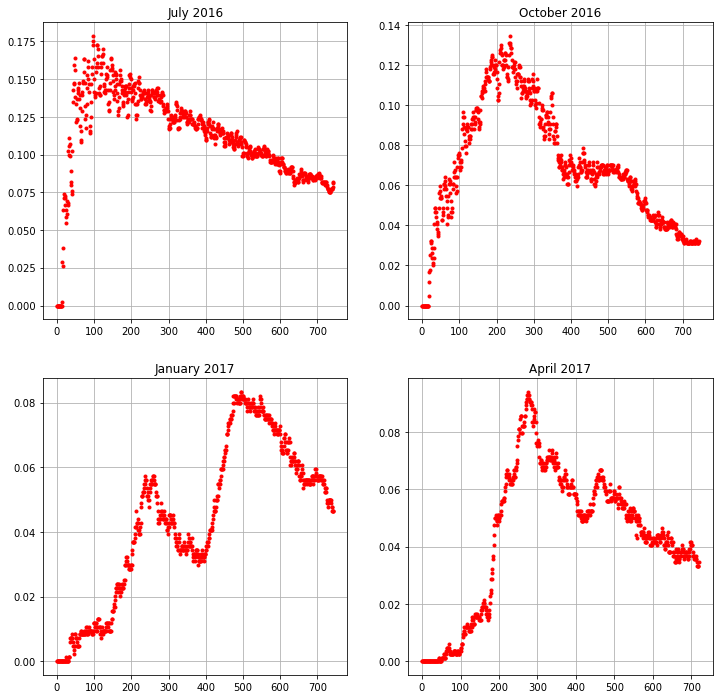

In [17]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_NE_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_NE_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_NE_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_NE_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# South

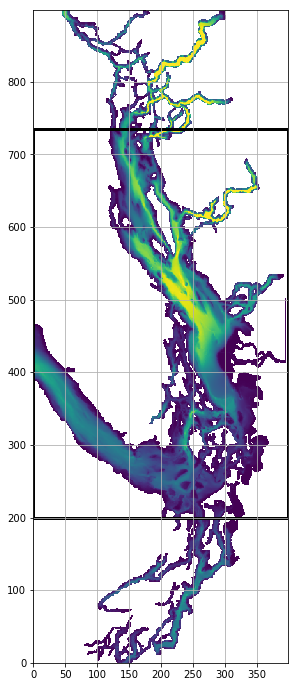

In [20]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((0,200), 398, 535, fill=False, linewidth=3))
ax.grid('on')

In [18]:
Jul_S_all = still_inside(0, 397, 200, 735, Jul_lont, Jul_latt)
Oct_S_all = still_inside(0, 397, 200, 735, Oct_lont, Oct_latt)
Jan_S_all = still_inside(0, 397, 200, 735, Jan_lont, Jan_latt)
Apr_S_all = still_inside(0, 397, 200, 735, Apr_lont, Apr_latt)

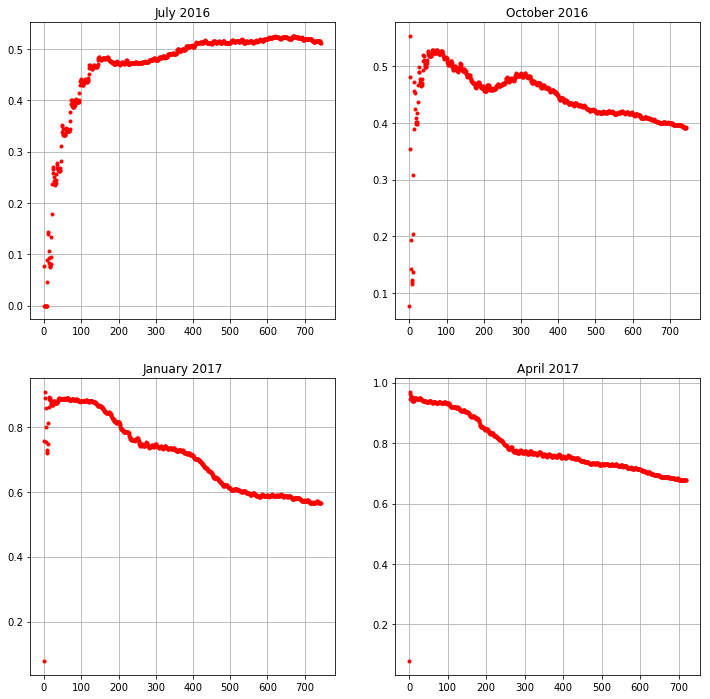

In [22]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_S_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_S_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_S_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_S_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [19]:
Jul_S_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 0, 397, 200, 735)
Oct_S_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 0, 397, 200, 735)
Jan_S_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 0, 397, 200, 735)
Apr_S_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 0, 397, 200, 735)

### Deep Particles

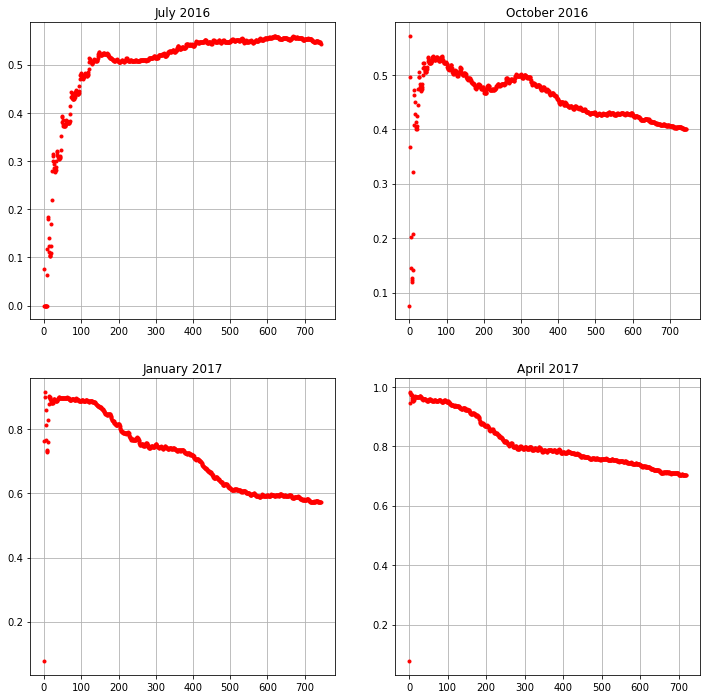

In [20]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_S_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_S_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_S_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_S_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [21]:
Jul_S_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 0, 397, 200, 735)
Oct_S_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 0, 397, 200, 735)
Jan_S_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 0, 397, 200, 735)
Apr_S_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 0, 397, 200, 735)

### Shallow Particles

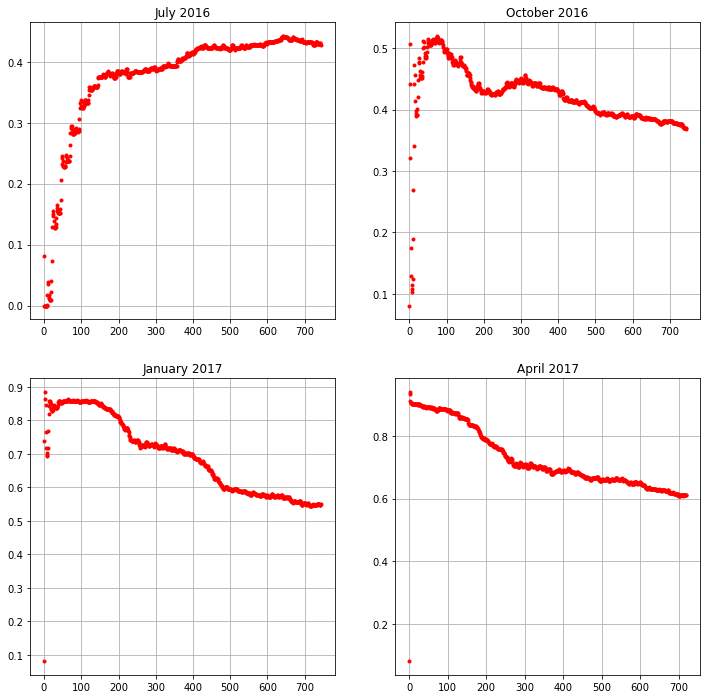

In [22]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_S_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_S_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_S_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_S_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# Baynes Sound

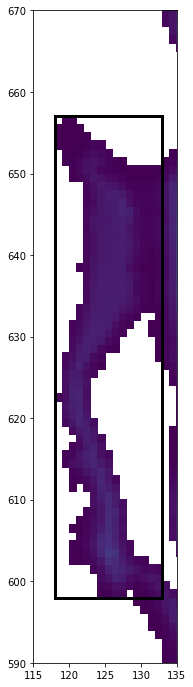

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((118,598), 15, 59, fill=False, linewidth=3))

In [24]:
Jul_BS_all = still_inside(118, 133, 598, 657, Jul_lont, Jul_latt)
Oct_BS_all = still_inside(118, 133, 598, 657, Oct_lont, Oct_latt)
Jan_BS_all = still_inside(118, 133, 598, 657, Jan_lont, Jan_latt)
Apr_BS_all = still_inside(118, 133, 598, 657, Apr_lont, Apr_latt)

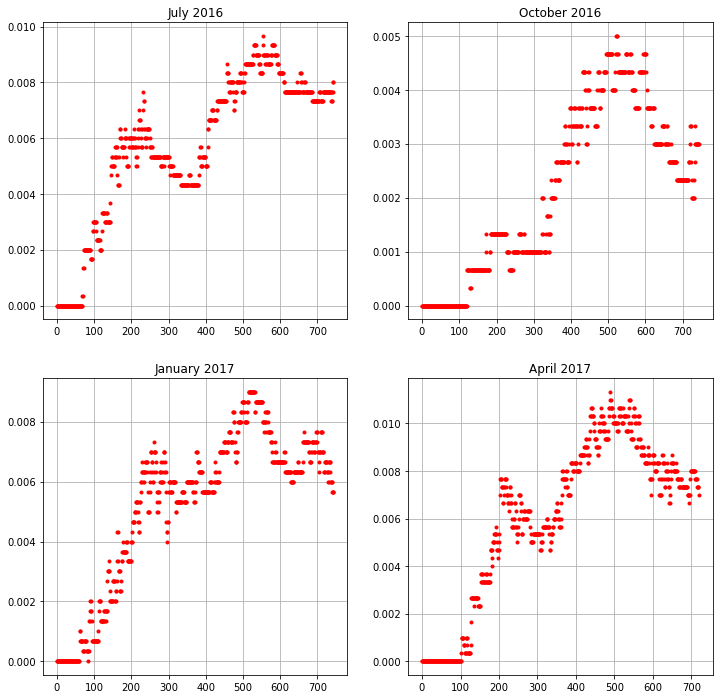

In [25]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_BS_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_BS_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_BS_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_BS_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [23]:
Jul_BS_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 118, 133, 598, 657)
Oct_BS_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 118, 133, 598, 657)
Jan_BS_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 118, 133, 598, 657)
Apr_BS_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 118, 133, 598, 657)

### Deep Particles

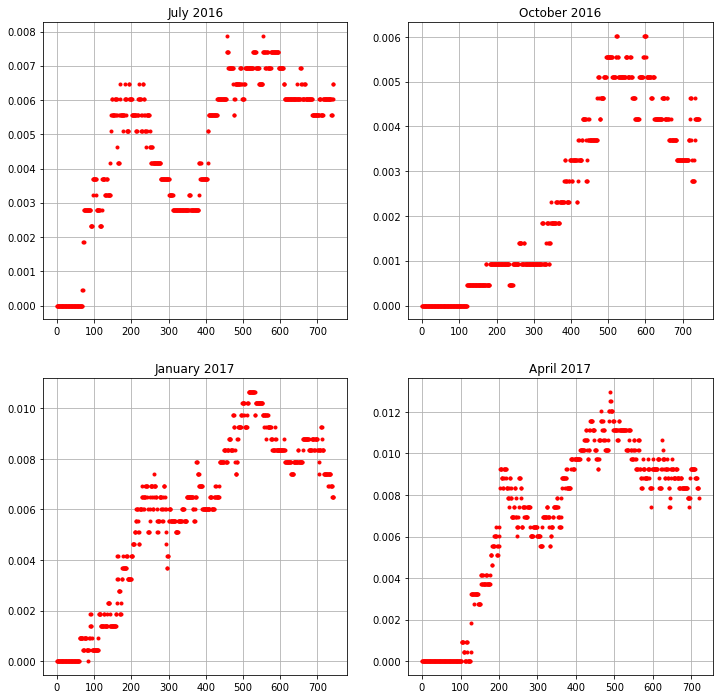

In [24]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_BS_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_BS_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_BS_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_BS_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [25]:
Jul_BS_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 118, 133, 598, 657)
Oct_BS_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 118, 133, 598, 657)
Jan_BS_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 118, 133, 598, 657)
Apr_BS_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 118, 133, 598, 657)

### Shallow Particles

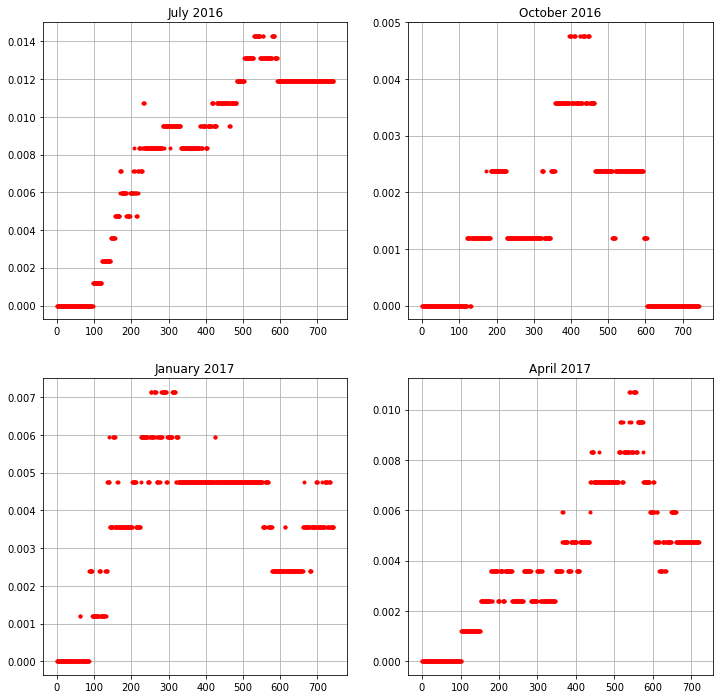

In [26]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_BS_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_BS_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_BS_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_BS_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

# Deep Bay

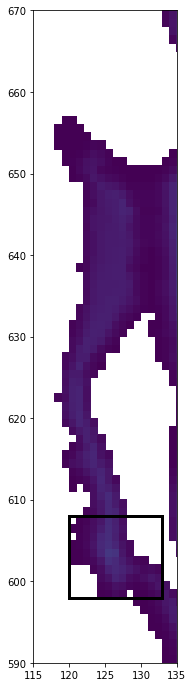

In [26]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(590,670)
ax.set_xlim(115,135)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((120,598), 13, 10, fill=False, linewidth=3))

In [27]:
Jul_DB_all = still_inside(120, 133, 598, 608, Jul_lont, Jul_latt)
Oct_DB_all = still_inside(120, 133, 598, 608, Oct_lont, Oct_latt)
Jan_DB_all = still_inside(120, 133, 598, 608, Jan_lont, Jan_latt)
Apr_DB_all = still_inside(120, 133, 598, 608, Apr_lont, Apr_latt)

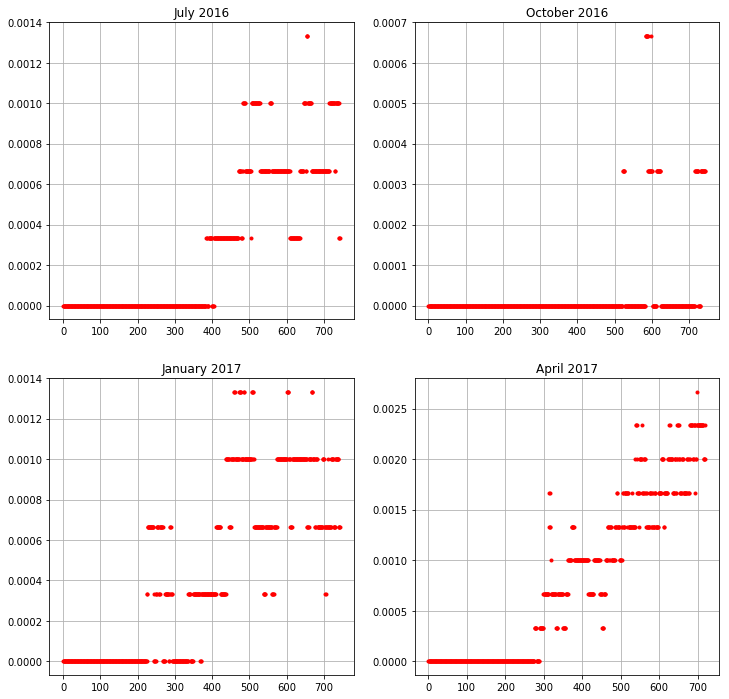

In [28]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_DB_all, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_DB_all, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_DB_all, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_DB_all, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [27]:
Jul_DB_deep = deep_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 120, 133, 598, 608)
Oct_DB_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 120, 133, 598, 608)
Jan_DB_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 120, 133, 598, 608)
Apr_DB_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 120, 133, 598, 608)

### Deep Particles

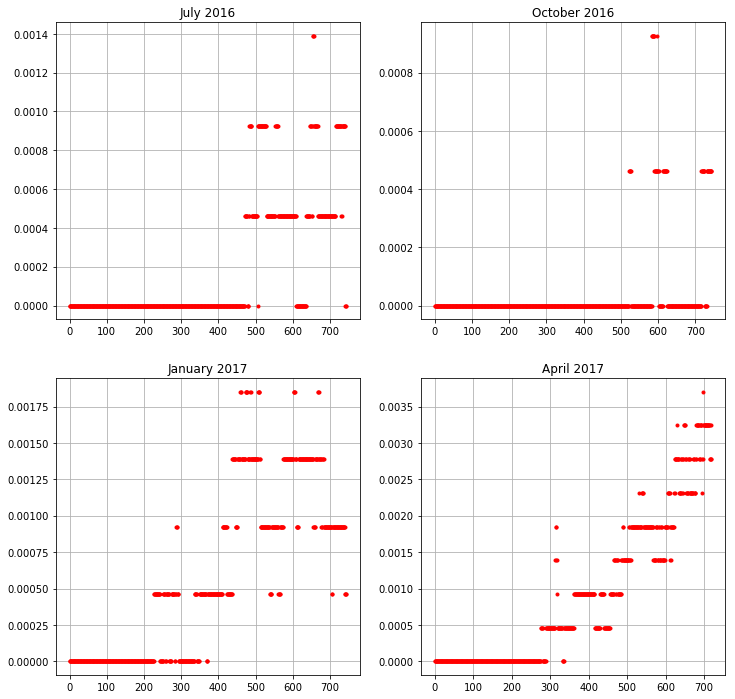

In [28]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_DB_deep, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_DB_deep, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_DB_deep, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_DB_deep, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [29]:
Jul_DB_shallow = shallow_particles(Jul_lont, Jul_latt, Jul.variables['init_z'], 120, 133, 598, 608)
Oct_DB_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 120, 133, 598, 608)
Jan_DB_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 120, 133, 598, 608)
Apr_DB_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 120, 133, 598, 608)

### Shallow Particles

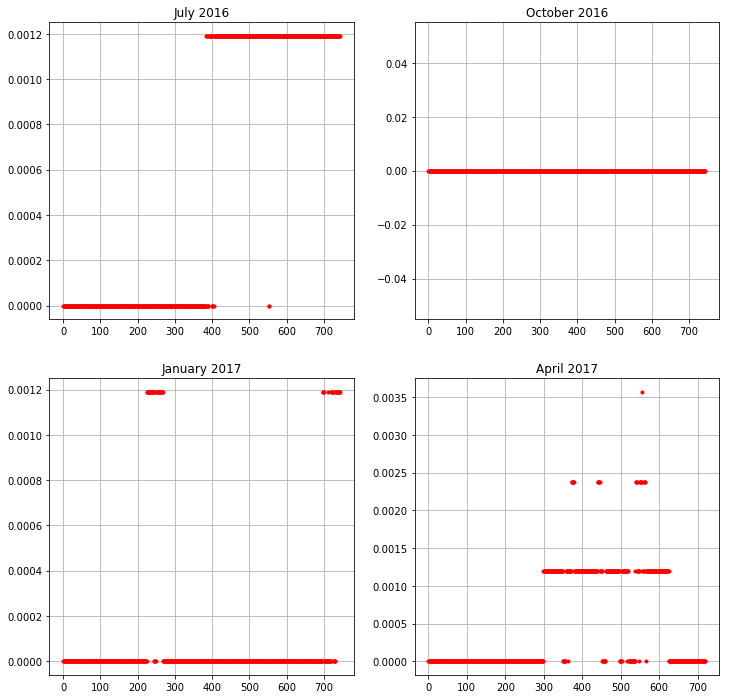

In [30]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_DB_shallow, 'r.')
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_DB_shallow, 'r.')
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_DB_shallow, 'r.')
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_DB_shallow, 'r.')
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')